In [361]:
from datetime import datetime, date, timedelta
from io import StringIO
import requests # pip install requests
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [132]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [232]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSOr5Q2RvQYwF1EMCyA43kDu-eEkA-m6Mmy_TNWxapsal78_v8hX8XEtwlllyJVv7fD-J1WRV03uHBN/pub?gid=583415138&single=true&output=csv"
content = requests.get(url).content
df_raw = pd.read_csv(StringIO(content.decode('utf-8')), low_memory=False)

In [233]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6623 entries, 0 to 6622
Columns: 134 entries, Carimbo de data/hora to Identificação do Incidente
dtypes: float64(96), object(38)
memory usage: 6.8+ MB


In [234]:
df_raw.columns.to_list()

['Carimbo de data/hora',
 'O incidente que você quer notificar está relacionado a algum paciente?',
 'Nome do paciente',
 'Nº do prontuário',
 'Idade:',
 'Raça:',
 'Diagnóstico do paciente',
 'Data da internação do paciente',
 'Data da ocorrência',
 'Horário da ocorrência',
 'Qual local de Ocorrência do Evento?',
 'Tipo do incidente',
 'Qual foi a causa da lesão de pele sofrida pelo paciente?',
 'Grau da Lesão por Pressão (LPP)',
 'Qual foi a provável causa da extubação?',
 'Qual foi a provável causa da retirada acidental de SVD?',
 'Qual foi a provável causa da retirada acidental de SNE/SNG?',
 'Qual foi a provável causa da retirada acidental de CVC?',
 'Qual foi o evento adverso sofrido pelo paciente?',
 'Tipo de queda',
 'Descreva detalhadamente o que ocorreu',
 'Por que você acha que aconteceu esse evento?',
 'Consequências para o paciente / Grau do dano:',
 'Se houve dano, qual foi?',
 'Setor Identificador do Incidente',
 'E-mail para devolutiva',
 'Qual foi a conduta realizada ap

In [248]:
df = df_raw

# df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')
df.columns = [ f"col_{n}" for n in range(len(df.columns))]

df['ano'] = df['col_8'].str[6:11]
df['mes'] = df['col_8'].str[3:5]
df['classificacao'] = df['col_126'].astype(str)

# remover as colunas onde todos os dados são nulos
df = df_raw.dropna(axis=1, how='all')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6623 entries, 0 to 6622
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   col_0          6572 non-null   object 
 1   col_1          5770 non-null   object 
 2   col_2          4446 non-null   object 
 3   col_3          4516 non-null   object 
 4   col_4          4514 non-null   object 
 5   col_5          3460 non-null   object 
 6   col_6          4519 non-null   object 
 7   col_7          4522 non-null   object 
 8   col_8          6573 non-null   object 
 9   col_9          6572 non-null   object 
 10  col_10         6573 non-null   object 
 11  col_11         6571 non-null   object 
 12  col_12         501 non-null    object 
 13  col_13         425 non-null    object 
 14  col_14         202 non-null    object 
 15  col_15         158 non-null    object 
 16  col_16         302 non-null    object 
 17  col_17         107 non-null    object 
 18  col_18  

In [250]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,ano,mes,classificacao
0,28/03/2020 12:20:31,SIM,NaN,82006,91,Parda,HIPOTESE DE CORONAVIRUS,20/03/2020,26/03/2020,Matutino (7 - 13),Ala B,Falha na assistência de enfermagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NÃO REALIZADO ACESSO CONFORME PRESCRIÇÃO DO DI...,FALTA DE TECNICA,Grave,"FALTA DE REALIZAÇÃO DE MEDICAÇÃO PRESCRITA, PA...",NaN,NaN,ENFERMAGEM FOI AVISADA TODOS OS DIAS DO OCORRI...,NaN,NaN,NaN,NaN,Avaliado,NaN,NaN,NaN,NaN,1,NaN,NaN,2020,03,Avaliado,2020,03,Avaliado,2020,03,Avaliado,2020,03,Avaliado
1,26/05/2021 19:40:53,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2021,Vespertino (13 - 19),Ala B,Falha na Comunicação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Médica do plantão (Mariana) quis definir a equ...,Confusão de atribuições profissionais,Nenhum,Nenhum,NaN,NaN,Notificação,NaN,NaN,NaN,NaN,Circunstância Notificável,NaN,NaN,NaN,NaN,2,NaN,NaN,2021,05,Circunstância Notificável,2021,05,Circunstância Notificável,2021,05,Circunstância Notificável,2021,05,Circunstância Notificável
2,26/05/2021 09:27:38,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2021,Matutino (7 - 13),Ala B,Falhas Relacionadas a Medicamentos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Posologia errada,Erro de prescrição de ATB,Nenhum,NaN,Busca Ativa,NaN,NaN,NaN,NaN,NaN,NaN,Near Miss,NaN,NaN,NaN,NaN,1,NaN,NaN,2021,05,Near Miss,2021,05,Near Miss,2021,05,Near Miss,2021,05,Near Miss
3,26/05/2021 09:27:38,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2021,Matutino (7 - 13),Ala B,Falhas Relacionadas a Medicamentos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Posologia errada,Erro de prescrição de ATB,Nenhum,NaN,Busca Ativa,NaN,NaN,NaN,NaN,NaN,NaN,Near Miss,NaN,NaN,NaN,NaN,1,NaN,NaN,2021,05,Near Miss,2021,05,Near Miss,2021,05,Near Miss,2021,05,Near Miss
4,26/05/2021 09:27:38,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2021,Matutino (7 - 13),Ala B,Falhas Relacionadas a Medicamentos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Posologia errada,Erro de prescrição de ATB,Nenhum,NaN,Busca Ativa,NaN,NaN,NaN,NaN,NaN,NaN,Near Miss,NaN,NaN,NaN,NaN,1,NaN,NaN,2021,05,Near Miss,2021,05,Near Miss,2021,05,Near Miss,2021,05,Near Miss


In [251]:
# filtra apenas os que tiverem 'Data da ocorrência'
df1 = df[df['col_8'].map(lambda x: len(str(x))) == 10].sort_values(by="col_8", ascending=True)

In [252]:
df1['ano'] = df1['ano'].astype(int)
df1['mes'] = df1['mes'].astype(int)


# df1[df1['ano'] <= 2000][['col_8', 'ano']] # verifica se existe algum ano inválido
# df1[df1['ano'] == 23].ano
df1['periodo'] = pd.to_datetime(df1['ano'].astype(str) + '-' + df1['mes'].astype(str) + '-01')

In [253]:
df1.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,ano,mes,classificacao,periodo
5168,07/01/2021 10:33:26,SIM,TODOS DA UTI COVID,NaN,NaN,Parda,COVID E DIVERSOS,01/01/2021,01/01/2021,Matutino (7 - 13),Ala B,Falha na higienização/limpeza hospitalar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRESENÇA CONSTANTE DIUTURNAMENTE DE MURIÇOCA E...,FALTA DE TELA E DEDETIZAÇÃO,Nenhum,.,RICARDO WAGNER,NaN,AGUARDANDO RESPOSTA,NaN,NaN,NaN,NaN,Incidente sem Dano,NaN,NaN,NaN,NaN,1,NaN,NaN,2021,01,Incidente sem Dano,2021,01,Incidente sem Dano,2021,01,Incidente sem Dano,2021,1,Incidente sem Dano,2021-01-01
1028,02/01/2022 07:36:24,SIM,Arthur Faria Borges,812493,2,Branca,abscesso cerebral,13/12/2021,01/01/2022,Vespertino (13 - 19),Ala A Pediátrica,Retirada Acidental de Cateter Venoso Central,NaN,NaN,NaN,NaN,NaN,Deslocamento/Perda acidental,NaN,NaN,Pela tereira vez consecutiva picc quebrou no l...,pessima qualidde do material,Moderado,diversas terntativas de novo acesso sem sucesso,Ala A Pediátrica,NaN,NaN,NaN,NaN,NaN,812493.0,Evento Adverso,M,13/01/2022,NaN,NaN,NaN,Não se aplica,AFB010122,2022,01,Evento Adverso,2022,01,Evento Adverso,2022,01,Evento Adverso,2022,1,Evento Adverso,2022-01-01
1034,03/01/2022 16:47:07,SIM,NILCE DE FATIMA DA ROCHA OLIVEIR,116180,61,NaN,DENGUE,27/12/2021,01/01/2022,Vespertino (13 - 19),Ala A Adulto,Evasão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PACIENTE EVADIU DA UNIDADE ACOMPANHADA DE SUA ...,FALHA NA ADESÃO,Moderado,NaN,Gerenciamento de Protocolos,NaN,ANALISE RETROSPECTIVA,NaN,NaN,NaN,2131686.0,Incidente sem Dano,F,NaN,NaN,NaN,NaN,Não se aplica,NFRO030122,2022,01,Incidente sem Dano,2022,01,Incidente sem Dano,2022,01,Incidente sem Dano,2022,1,Incidente sem Dano,2022-01-01
1326,01/02/2022 11:42:45,NÃO,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2022,Matutino (7 - 13),Institucional,Falha na Comunicação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SETOR DE PROTOCOLO COLABORADORA FATIMA, ATENDE...","FALHA DE COMUNICAÇÃO, FALTA DE CORDIALIDADE",Nenhum,NaN,Suprimentos,NaN,NOTIFICADO,NaN,NaN,NaN,NaN,Circunstância Notificável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,01,Circunstância Notificável,2022,01,Circunstância Notificável,2022,01,Circunstância Notificável,2022,1,Circunstância Notificável,2022-01-01
1027,02/01/2022 05:28:17,SIM,SANDRA SANTANA PEREIRA,539391,40,Parda,MH TRATADA/INFECÇÃO DE PELE,01/01/2022,01/01/2022,Noturno (19 - 7),Ala C,Queda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Queda da Própria Altura,"PACIENTE ADMITIDA DA UTI, DEAMBULA, FOI AO BAN...",DEVIDO VERTIGEM,Leve,NaN,Ala C,NaN,"AVALIO PACIENTE, ORIENTO QUANTO AOS CUIDADOS P...",NaN,NaN,NaN,2088528.0,Evento Adverso,F,13/01/2022,NaN,NaN,NaN,Não se aplica,SSP010122,2022,01,Evento Adverso,2022,01,Evento Adverso,2022,01,Evento Adverso,2022,1,Evento Adverso,2022-01-01


In [254]:
df1.query('ano==2020 & mes==1')

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,ano,mes,classificacao,periodo
4536,20/07/2020 19:49:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/01/2020,Noturno (19 - 7),Ala E,Falhas relacionadas à medicamentos,NaN,NaN,NaN,NaN,NaN,NaN,Falha na dispensação,NaN,Fármacia comunica que não havia ampola de prop...,Distração,Leve,Atraso na sedação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avaliado,NaN,NaN,NaN,NaN,1,NaN,NaN,2020,01,Avaliado,2020,01,Avaliado,2020,01,Avaliado,2020,1,Avaliado,2020-01-01
5184,09/01/2021 19:24:06,SIM,WEMERSON FERREIRA DE SOUZA,86271,21,Parda,HIV,11/12/2020,09/01/2020,Vespertino (13 - 19),Ala C,Falha na assistência de enfermagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A ADENTRAR NO QUARTO PACIENTE ESTAVA COM A SON...,FALTA DE ASSISTÊNCIA DA EQUIPE DE ENFERMAGEM,Grave,RISCO DE BRONCOASPIRAÇÂO,NaN,NaN,INFORMAR A EQUIPE E A CHEFIA IMEDIATA.,NaN,NaN,NaN,NaN,Evento Adverso,NaN,NaN,NaN,NaN,1,NaN,NaN,2020,01,Evento Adverso,2020,01,Evento Adverso,2020,01,Evento Adverso,2020,1,Evento Adverso,2020-01-01
4997,02/12/2020 09:29:38,NaN,Samyra Cassiano de Sousa,485409,41,Preta,Leishimaniose cutanea,11/11/2020,12/01/2020,Matutino (7 - 13),Ala C,Paciente não quer aderir ao tratamento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Paciente consciente, acordada, responsiva, pol...",Resistencia em aderir ao tratamento,Nenhum,NaN,Adryelli Joicy,NaN,NaN,NaN,NaN,NaN,NaN,Avaliado,NaN,NaN,NaN,NaN,1,NaN,NaN,2020,01,Avaliado,2020,01,Avaliado,2020,01,Avaliado,2020,1,Avaliado,2020-01-01
5342,28/01/2021 19:02:37,NÂO,NaN,NaN,NaN,NaN,NaN,NaN,25/01/2020,Noturno (19 - 7),Emergência,Falha na assistência médica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDICAS MAIARA E MARCELA DA EMERGENCIA FORAM P...,DESCUMPRIMENTO DE ORDEM DA DIRETORIA TECNICA,Nenhum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Circunstância Notificável,NaN,NaN,NaN,NaN,1,NaN,NaN,2020,01,Circunstância Notificável,2020,01,Circunstância Notificável,2020,01,Circunstância Notificável,2020,1,Circunstância Notificável,2020-01-01


In [297]:
df_p0 = df1[['periodo', 'classificacao']].groupby(['periodo']).count().reset_index().sort_values(by=['periodo'], ascending=True)
df_p1 = df_p0.set_index('periodo')

In [298]:
df_p1.head()
# df_p1.index[0]

,classificacao
periodo,
2020-01-01,4
2020-02-01,4
2020-03-01,11
2020-04-01,58
2020-05-01,43


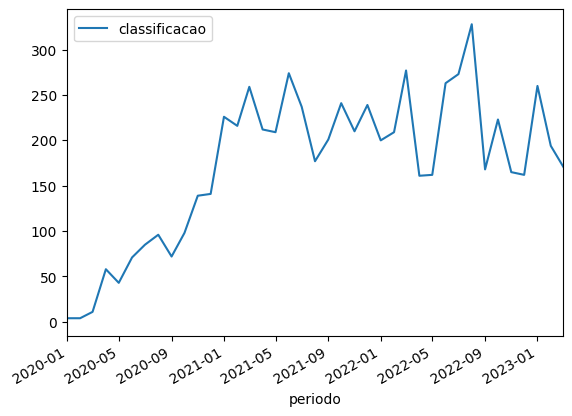

In [299]:
# plt.xlim(df_p1.index[0], datetime.now())

# plota o gráfico de linha
df_p1.plot(kind='line', y='classificacao', xlim=(df_p1.index[0], datetime.now()))

# exibe o gráfico
plt.show()

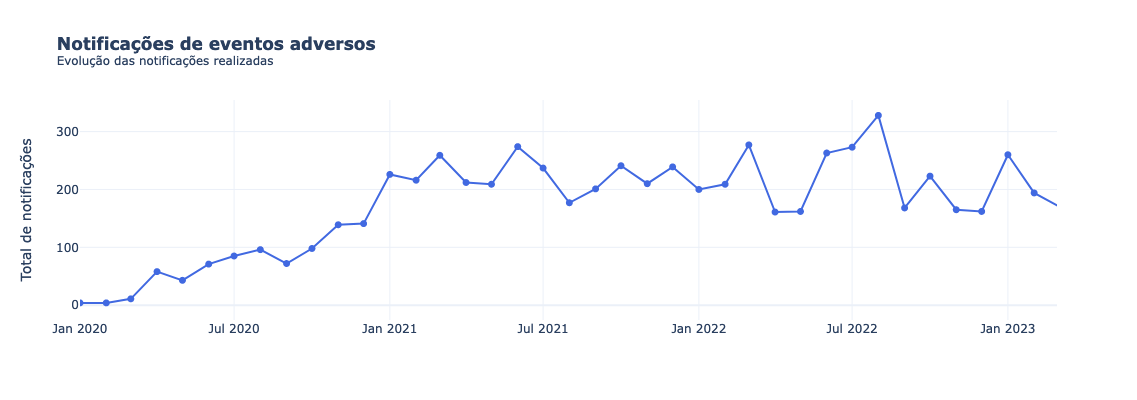

In [358]:
# converte a coluna 'periodo' em uma lista de strings
periodo_str = df_p0['periodo'].dt.strftime('%Y-%m-%d').tolist()

# obtém a data atual
data_atual = datetime.now()

# cria o objeto Scatter
# scatter = go.Scatter(x=periodo_str, y=df_p0['classificacao'], mode='lines')
scatter = go.Scatter(x=periodo_str, 
                     y=df_p0['classificacao'],
                     mode='markers+lines', 
                     marker=dict(size=7, color="royalblue"),
                     hovertemplate='Total: %{y}<br>Periodo: %{x}')

# cria o objeto Figure
fig = go.Figure(scatter)

# define o layout do gráfico
fig.update_layout(
    xaxis=dict(range=[periodo_str[0], data_atual.strftime('%Y-%m-%d')]),
    template='plotly_white',
    title='<b>Notificações de eventos adversos</b><br><sup>Evolução das notificações realizadas</sup>',
    xaxis_title='',
    yaxis_title='Total de notificações',
    height=400,
)

# exibe o gráfico
fig.show()

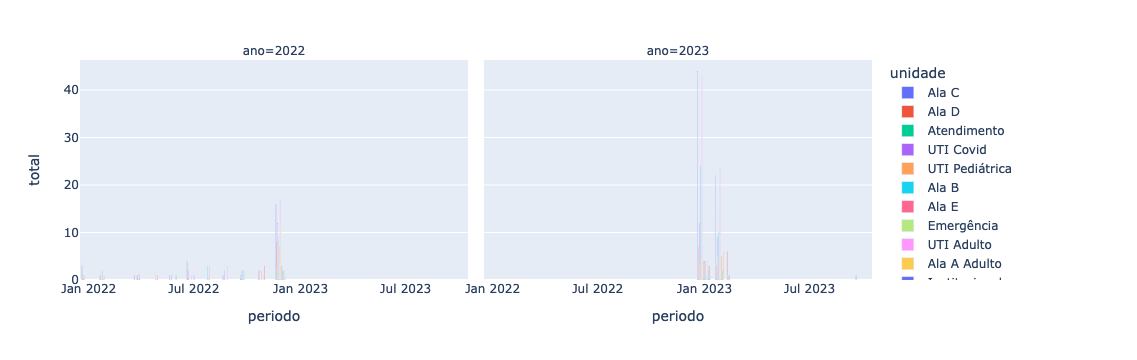

In [408]:
import plotly.express as px

data_inicio = date(2022, 12, 1)
data_fim = date(2023, 3, 1)

df_filtrado = df1
df_filtrado['col_8'] = pd.to_datetime(df_filtrado['col_8'])
df_filtrado = df1.query('col_8>=@data_inicio and col_8<=@data_fim').sort_values(by="col_8", ascending=True)

dfx = (df_filtrado[['col_8', 'ano', 'mes', 'periodo', 'col_10']]
       .groupby(['periodo', 'ano', 'mes', 'col_10'])
       .count()
       .reset_index()
       .sort_values(by=['periodo', 'col_10'], ascending=True)
       .rename(columns={"col_10": "unidade", "col_8": "total"})
      )

# dfx.head(10)
px.bar(dfx, x='periodo', y='total', color='unidade', barmode="group", facet_col="ano")
# px.bar(dfx, x='periodo', y='total', color='unidade')
# len(dfx.unidade.unique())

In [410]:
dfx.head(10)

,periodo,ano,mes,unidade,total
0,2022-01-01,2022,1,Ala C,3
1,2022-01-01,2022,1,Ala D,1
2,2022-01-01,2022,1,Atendimento,1
3,2022-01-01,2022,1,UTI Covid,1
4,2022-01-01,2022,1,UTI Pediátrica,1
5,2022-02-01,2022,2,Ala B,2
6,2022-02-01,2022,2,Ala C,1
7,2022-02-01,2022,2,Ala D,1
8,2022-02-01,2022,2,Ala E,1
9,2022-02-01,2022,2,Emergência,1


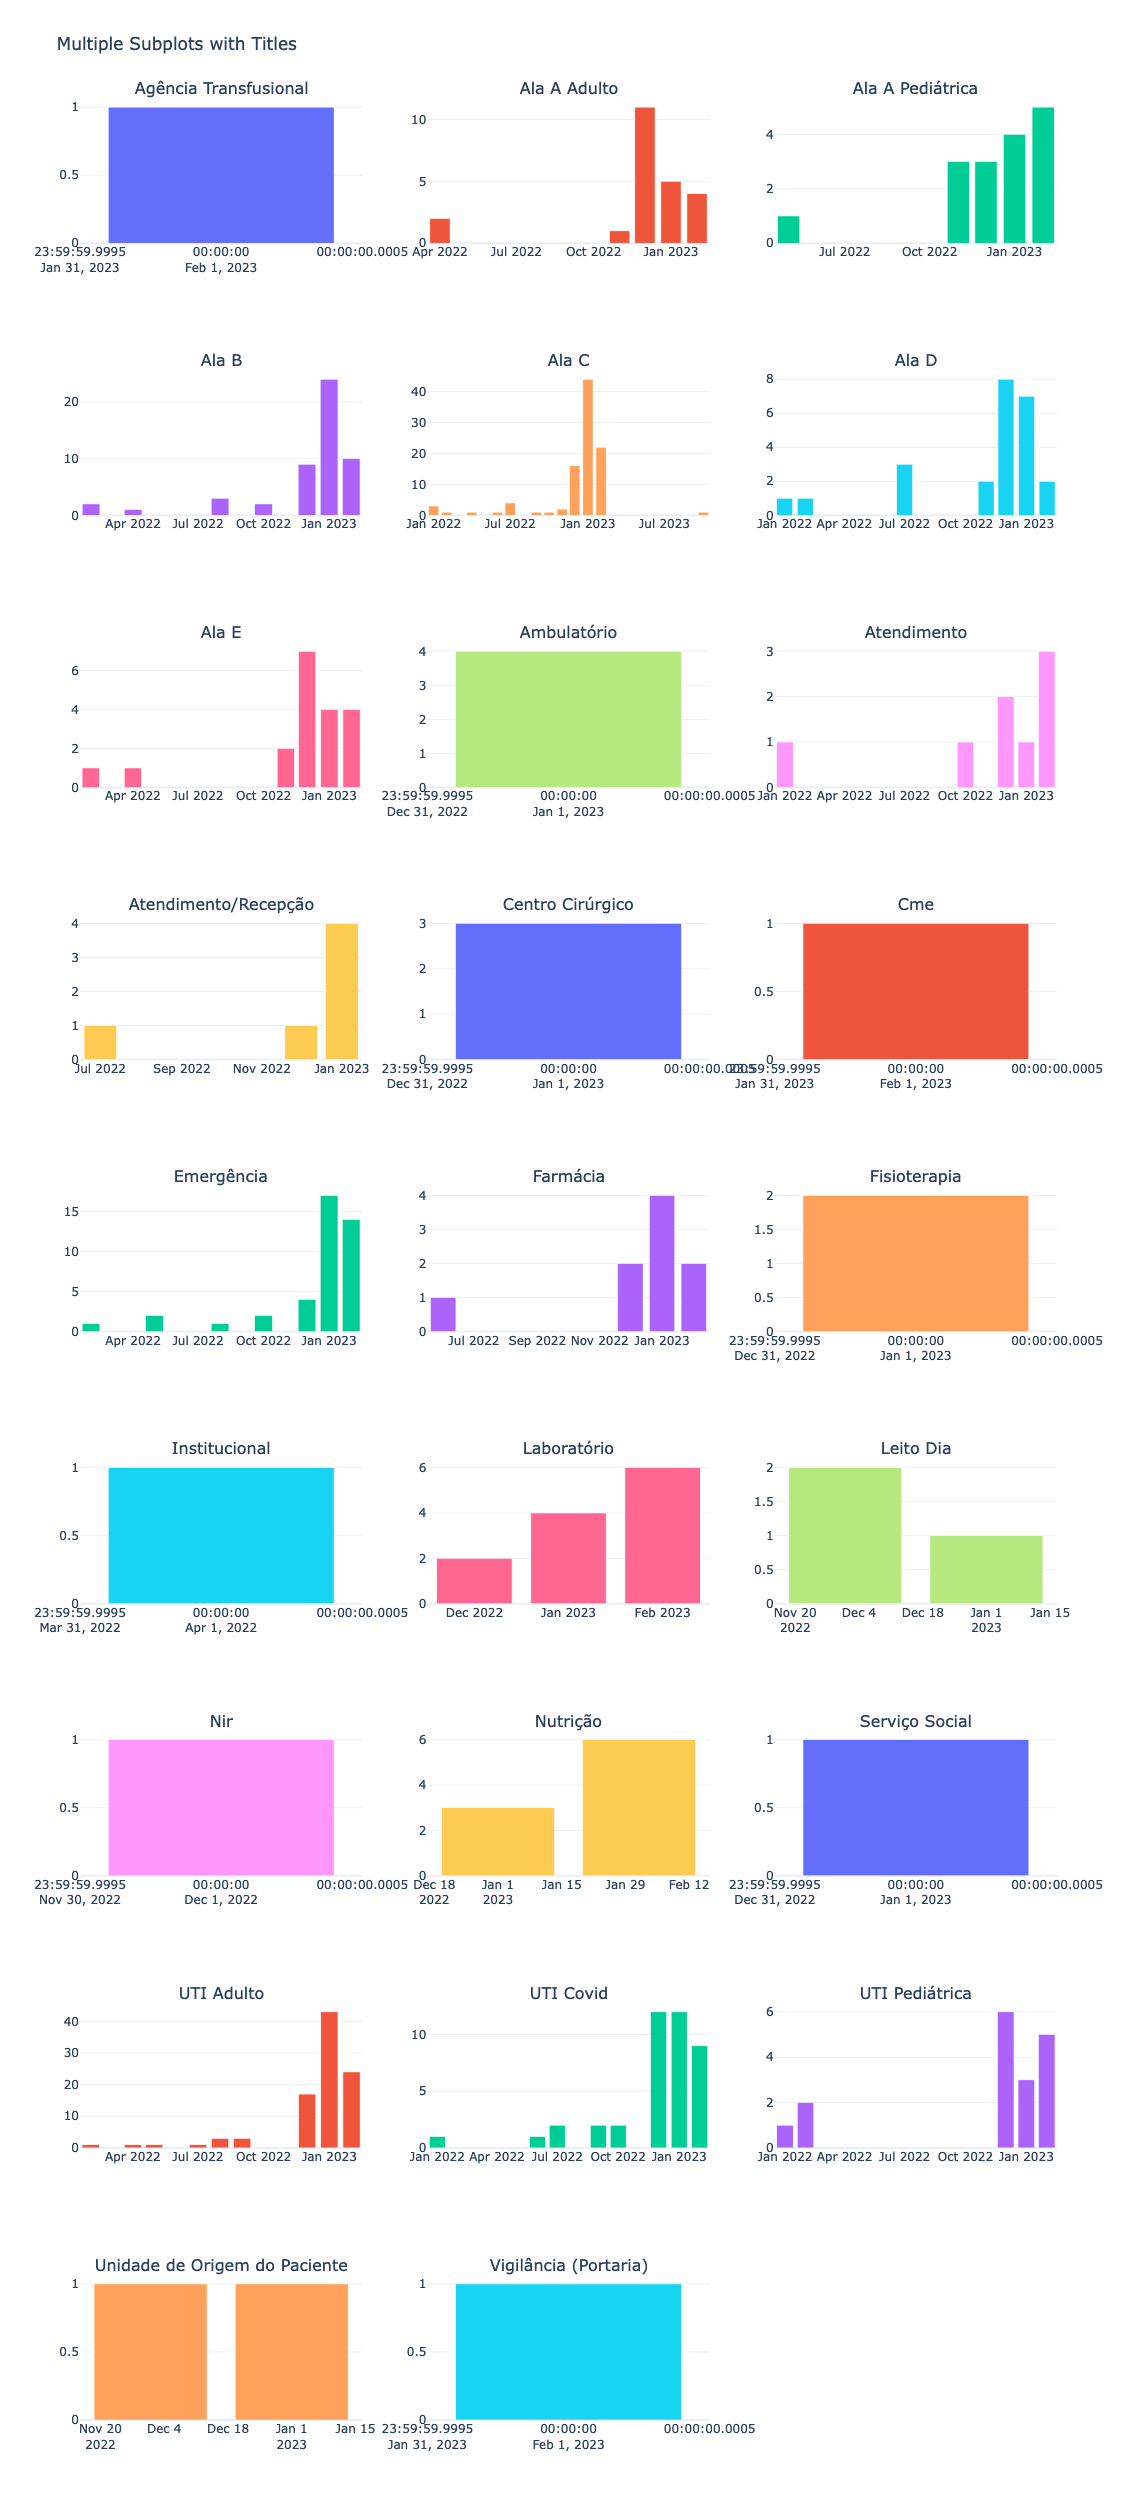

In [427]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

nrows = 9
ncols = 3
nrow = 1
ncol = 1

unidades = dfx.sort_values(by="unidade").unidade.unique()

fig = make_subplots(
    rows=nrows, cols=ncols,
    subplot_titles=unidades)#("Plot 1", "Plot 2", "Plot 3", "Plot 4"))

for unidade in unidades:
    df_temp = dfx.query('unidade==@unidade')
    # print(f"--[ {unidade} ]--")
    # print(df_temp)
    fig.add_trace(go.Bar(x=df_temp.periodo, y=df_temp.total),
              row=nrow, col=ncol)
    if ncol >= ncols:
        ncol = 1
        nrow += 1
    else:
        ncol += 1
    
    
# fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
#               row=1, col=1)

# fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
#               row=1, col=2)

# fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
#               row=2, col=1)

# fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
#               row=2, col=2)

fig.update_layout(height=2500, width=1000,
                  template='plotly_white',
                  title_text="Multiple Subplots with Titles")
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()